This is project is to predict the Salary of Developers in various countries. Features such as Country, Years of Experience, Educational background or level and its remote, hybrid or On-site role would be used to determine the salaries. This model can be instrumental to both developers seeking out opportunities and also for Hiring managers looking to get there next talent. 

This project is to improve my last Developer Salary prediction. The data used for this project is the StackOverFlow Developer Salary 2023. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data 
df = pd.read_csv('/Users/mac/Desktop/projects/developer_salary_2023/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [5]:
df = df[['Employment', 'RemoteWork', 'EdLevel', 'YearsCodePro', 'Country', 'WorkExp', 'DevType', 'CompTotal']]

In [6]:
df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,WorkExp,DevType,CompTotal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,United States of America,10.0,"Senior Executive (C-Suite, VP, etc.)",285000.0
2,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,United States of America,23.0,"Developer, back-end",250000.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,United States of America,7.0,"Developer, front-end",156000.0
4,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Philippines,6.0,"Developer, full-stack",1320000.0


In [7]:
df['DevType'].unique()

array([nan, 'Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [8]:
df['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [9]:
df['RemoteWork'].unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [10]:
df['CompTotal'].unique()

array([        nan, 2.85000e+05, 2.50000e+05, ..., 3.55410e+04,
       2.12021e+05, 3.30000e+09])

In [11]:
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [12]:
df['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [13]:
df['WorkExp'].unique()

array([nan, 10., 23.,  7.,  6., 22.,  4.,  5.,  3.,  9., 15., 14., 18.,
       13., 39.,  2., 28., 12., 17., 25., 11., 16., 30., 20., 24., 19.,
        1.,  8., 26., 38., 27., 32., 21., 40.,  0., 34., 35., 29., 33.,
       37., 36., 31., 48., 45., 42., 43., 44., 50., 41., 46., 47., 49.])

In [14]:
df['CompTotal'].dropna(inplace=True)

In [15]:
df.isnull().sum()

Employment       1286
RemoteWork      15374
EdLevel          1211
YearsCodePro    23048
Country          1211
WorkExp         45605
DevType         12312
CompTotal       40959
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Employment      0
RemoteWork      0
EdLevel         0
YearsCodePro    0
Country         0
WorkExp         0
DevType         0
CompTotal       0
dtype: int64

In [18]:
df.shape

(32595, 8)

In [19]:
# drop employed column since one has to employed to recieve any sort of compensation

df = df.drop('Employment', axis=1)
df.head()

,RemoteWork,EdLevel,YearsCodePro,Country,WorkExp,DevType,CompTotal
1,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,United States of America,10.0,"Senior Executive (C-Suite, VP, etc.)",285000.0
2,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,United States of America,23.0,"Developer, back-end",250000.0
3,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,United States of America,7.0,"Developer, front-end",156000.0
4,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Philippines,6.0,"Developer, full-stack",1320000.0
5,Remote,Some college/university study without earning ...,21,United Kingdom of Great Britain and Northern I...,22.0,"Developer, back-end",78000.0


In [20]:
# drop wok experience column
df = df.drop('WorkExp', axis=1)
df.head()

,RemoteWork,EdLevel,YearsCodePro,Country,DevType,CompTotal
1,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,United States of America,"Senior Executive (C-Suite, VP, etc.)",285000.0
2,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,United States of America,"Developer, back-end",250000.0
3,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,United States of America,"Developer, front-end",156000.0
4,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Philippines,"Developer, full-stack",1320000.0
5,Remote,Some college/university study without earning ...,21,United Kingdom of Great Britain and Northern I...,"Developer, back-end",78000.0


# Data Cleaning

In [21]:
df['RemoteWork'].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [22]:
def cleanwork(x):
    if 'Remote' == x:
        return 'Remote'
    elif 'Hybrid' in x:
        return 'Hybrid'
    else:
        return 'On-site'

df['RemoteWork'] = df['RemoteWork'].apply(cleanwork)

In [23]:
df['RemoteWork'].value_counts()

Remote     14202
Hybrid     13867
On-site     4526
Name: RemoteWork, dtype: int64

In [24]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [25]:
def edu(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s Degree"
    elif "Master’s degree" in x:
        return "Master’s Degree"
    elif "Professional degree" in x:
        return 'Doctorate Degree'
    else:
        return "Less than Bachelor’s"
    
df['EdLevel'] = df['EdLevel'].apply(edu)

In [26]:
df.head()

,RemoteWork,EdLevel,YearsCodePro,Country,DevType,CompTotal
1,Remote,Bachelor’s Degree,9,United States of America,"Senior Executive (C-Suite, VP, etc.)",285000.0
2,Hybrid,Bachelor’s Degree,23,United States of America,"Developer, back-end",250000.0
3,Hybrid,Bachelor’s Degree,7,United States of America,"Developer, front-end",156000.0
4,Remote,Bachelor’s Degree,4,Philippines,"Developer, full-stack",1320000.0
5,Remote,Less than Bachelor’s,21,United Kingdom of Great Britain and Northern I...,"Developer, back-end",78000.0


In [27]:
df['EdLevel'].unique()

array(['Bachelor’s Degree', 'Less than Bachelor’s', 'Master’s Degree',
       'Doctorate Degree'], dtype=object)

In [28]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Research & Development role', 'System administrator',
       'Developer, mobile', 'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications',
       'Academic researcher', 'Cloud infrastructure engineer',
       'Other (please specify):', 'Developer Experience',
       'Engineering manager', 'Engineer, data', 'DevOps specialist',
       'Database administrator', 'Engineer, site reliability',
       'Data or business analyst', 'Blockchain',
       'Developer, game or graphics', 'Security professional',
       'Developer Advocate', 'Product manager', 'Project manager',
       'Hardware Engineer', 'Scientist',
       'Marketing or sales professional', 'Educator', 'Student'],
      dtype=object)

In [29]:
def cleandev(x):
    if 'back-end' in x:
        return 'Backend Developer'
    elif 'front-end' in x:
        return 'Frontend Developer'
    elif 'full-stack' in x:
        return 'Fullstack Developer'
    elif 'QA' in x:
        return 'QA Tester'
    elif 'Designer' in x:
        return 'Designer'
    elif 'Data scientist' in x:
        return 'Data Scientist'
    elif 'Research & Development role' in x:
        return 'Research & Development'
    elif 'System admininstrator' in x:
        return 'System Admin'
    elif 'mobile' in x:
        return 'Mobile Developer'
    elif 'embedded applications or devices' in x:
        return 'Embedded Systems Engineer'
    elif 'desktop or enterprise applications' in x:
        return 'Enterprise/Desktop Engineer'
    elif 'Academic researcher' in x:
        return 'Academic Researcher'
    elif 'Cloud infrastructure engineer' in x:
        return 'Cloud Engineer'
    elif 'Developer Experience' in x:
        return 'Developer Experience'
    elif 'Engineering manager' in x:
        return 'Engineering manager'
    elif 'Engineer, data' in x:
        return 'Data Engineer'
    elif 'DevOps specialist' in x:
        return 'DevOps Engineer'
    elif 'Database administrator' in x:
        return 'Database Administrator'
    elif 'site reliability' in x:
        return 'Site Reliability Engineer'
    elif 'Data or business analyst' in x:
        return 'Data Analyst'
    elif 'Blockchain' in x:
        return 'Blockchain Developer'
    elif 'game or graphics' in x:
        return 'Game Developer'
    elif 'Security professional' in x:
        return 'Security'
    elif 'Developer Advocate' in x:
        return 'Developer Advocate'
    elif 'Product manager' in x:
        return 'Product Manager'
    elif 'Project manager' in x:
        return 'Project Manager'
    elif 'Hardware Engineer' in x:
        return x
    elif 'Scientist' in x:
        return x
    elif 'Marketing' in x:
        return x
    else:
        return x
    

df['DevType']= df['DevType'].apply(cleandev)

# # 'Product manager', 'Project manager',
#        'Hardware Engineer', 'Scientist',
#        'Marketing or sales professional', 'Educator', 'Student'

In [30]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Backend Developer',
       'Frontend Developer', 'Fullstack Developer', 'QA Tester',
       'Designer', 'Data Scientist', 'Research & Development',
       'System administrator', 'Mobile Developer',
       'Embedded Systems Engineer', 'Enterprise/Desktop Engineer',
       'Academic Researcher', 'Cloud Engineer', 'Other (please specify):',
       'Developer Experience', 'Engineering manager', 'Data Engineer',
       'DevOps Engineer', 'Database Administrator',
       'Site Reliability Engineer', 'Data Analyst',
       'Blockchain Developer', 'Game Developer', 'Security',
       'Developer Advocate', 'Product Manager', 'Project Manager',
       'Hardware Engineer', 'Scientist',
       'Marketing or sales professional', 'Educator', 'Student'],
      dtype=object)

In [31]:
# since we are focusing on developers
# we would remove non-developers role
for index, row in df.iterrows():
    if 'Senior Executive (C-Suite, VP, etc.)' in row['DevType']:
        df.drop(index, inplace=True)

In [32]:
for index, row in df.iterrows():
    if 'Marketing or sales professional' in row['DevType'] or 'Other (please specify)' in row['DevType'] or 'Student' in row['DevType']:
        df.drop(index, inplace=True)

In [33]:
for index, row in df.iterrows():
    if 'Scientist' ==  row['DevType']:
        df.drop(index, inplace=True)

In [34]:
df['DevType'].value_counts()

Fullstack Developer            11677
Backend Developer               6851
Frontend Developer              2238
Enterprise/Desktop Engineer     1563
Mobile Developer                1190
Engineering manager              951
Embedded Systems Engineer        862
DevOps Engineer                  681
Data Scientist                   656
Data Engineer                    614
Research & Development           544
Cloud Engineer                   514
Academic Researcher              345
Game Developer                   327
Data Analyst                     264
QA Tester                        238
Site Reliability Engineer        223
System administrator             174
Project Manager                  164
Developer Experience             147
Security                         146
Blockchain Developer             119
Product Manager                  118
Hardware Engineer                102
Developer Advocate                74
Database Administrator            71
Educator                          65
D

In [35]:
df.head()

,RemoteWork,EdLevel,YearsCodePro,Country,DevType,CompTotal
2,Hybrid,Bachelor’s Degree,23,United States of America,Backend Developer,250000.0
3,Hybrid,Bachelor’s Degree,7,United States of America,Frontend Developer,156000.0
4,Remote,Bachelor’s Degree,4,Philippines,Fullstack Developer,1320000.0
5,Remote,Less than Bachelor’s,21,United Kingdom of Great Britain and Northern I...,Backend Developer,78000.0
6,Remote,Less than Bachelor’s,3,United States of America,Fullstack Developer,135000.0


In [36]:
df['Country'].value_counts()

United States of America                                7524
Germany                                                 2552
United Kingdom of Great Britain and Northern Ireland    2179
India                                                   1484
Canada                                                  1332
                                                        ... 
Palau                                                      1
Malawi                                                     1
Botswana                                                   1
Namibia                                                    1
Antigua and Barbuda                                        1
Name: Country, Length: 162, dtype: int64

In [37]:
# we can see some countries have very few representatives adn others have more
# group countries with range of number of developers together
def shorten_categories(categories, cutoff):
    categorical_map = {}
    # cutoff number we can play around with
    for i in range(len(categories)):
      # for country count_value equal or greater than the cutoff, keep
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
          # otherwise group them as 'Other'
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
     


In [38]:
country_map = shorten_categories(df.Country.value_counts(), 45)
df['Country']= df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                7524
Germany                                                 2552
United Kingdom of Great Britain and Northern Ireland    2179
India                                                   1484
Canada                                                  1332
                                                        ... 
Kenya                                                     53
Latvia                                                    53
Nepal                                                     51
Uruguay                                                   51
Peru                                                      50
Name: Country, Length: 67, dtype: int64

In [39]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland',
       'Netherlands', 'Germany', 'France', 'Other', 'Spain',
       'South Africa', 'Italy', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lithuania', 'Serbia', 'Egypt',
       'Brazil', 'Latvia', 'Australia', 'Greece', 'Norway', 'Turkey',
       'Sweden', 'India', 'Poland', 'Finland', 'Nepal', 'Slovenia',
       'China', 'Portugal', 'Austria', 'Belgium', 'Romania', 'Croatia',
       'Denmark', 'Russian Federation', 'Iran, Islamic Republic of...',
       'Hungary', 'Viet Nam', 'Israel', 'Ukraine', 'Indonesia', 'Ireland',
       'Georgia', 'Malaysia', 'Czech Republic', 'Kenya',
       'United Arab Emirates', 'Pakistan', 'New Zealand', 'Nigeria',
       'Japan', 'Bulgaria', 'Singapore', 'Peru', 'Slovakia',
       'Hong Kong (S.A.R.)', 'Thailand', 'Colombia', 'Mexico', 'Estonia',
       'Chile', 'Uruguay', 'South Korea', 'Taiwan'], dtype=object)

In [40]:
df = df.rename(columns={'CompTotal': 'Salary'})

In [41]:
df.head()

,RemoteWork,EdLevel,YearsCodePro,Country,DevType,Salary
2,Hybrid,Bachelor’s Degree,23,United States of America,Backend Developer,250000.0
3,Hybrid,Bachelor’s Degree,7,United States of America,Frontend Developer,156000.0
4,Remote,Bachelor’s Degree,4,Philippines,Fullstack Developer,1320000.0
5,Remote,Less than Bachelor’s,21,United Kingdom of Great Britain and Northern I...,Backend Developer,78000.0
6,Remote,Less than Bachelor’s,3,United States of America,Fullstack Developer,135000.0


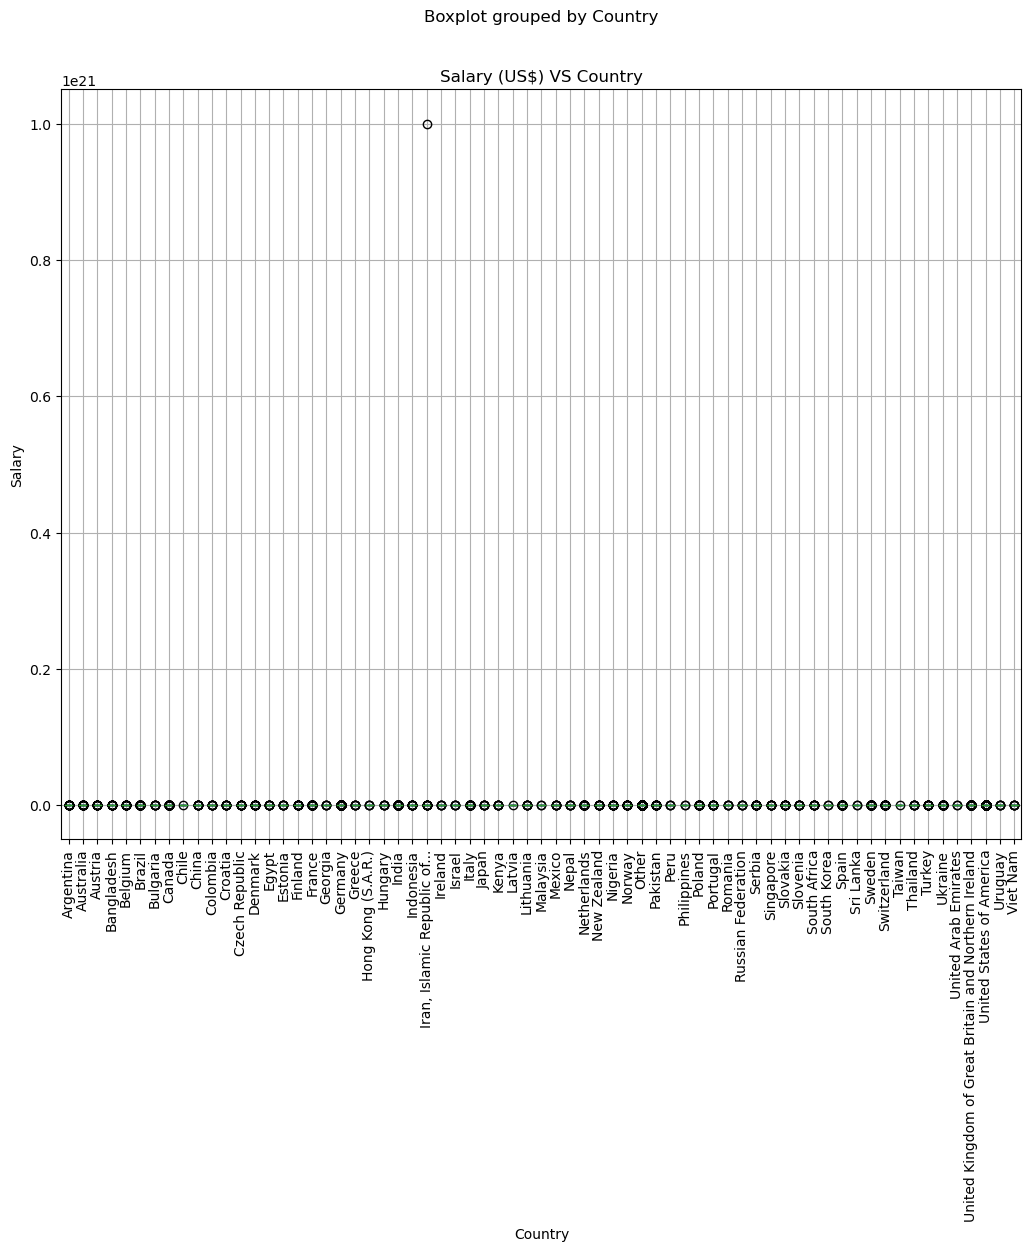

<Figure size 640x480 with 0 Axes>

In [42]:
# check salary range using boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

In [43]:


#Q3 is less than $500000 which is the median of upper half
# also the above plot shows the outliers start from below $100000
# and we want to get the median of the salary
# Salary less than or equal to $400000
df = df[df['Salary'] <= 500000]

# Salary greater than  or equal to $50000
df = df[df['Salary'] >= 50000]

# drop Others
df = df[df['Country'] != 'Other']

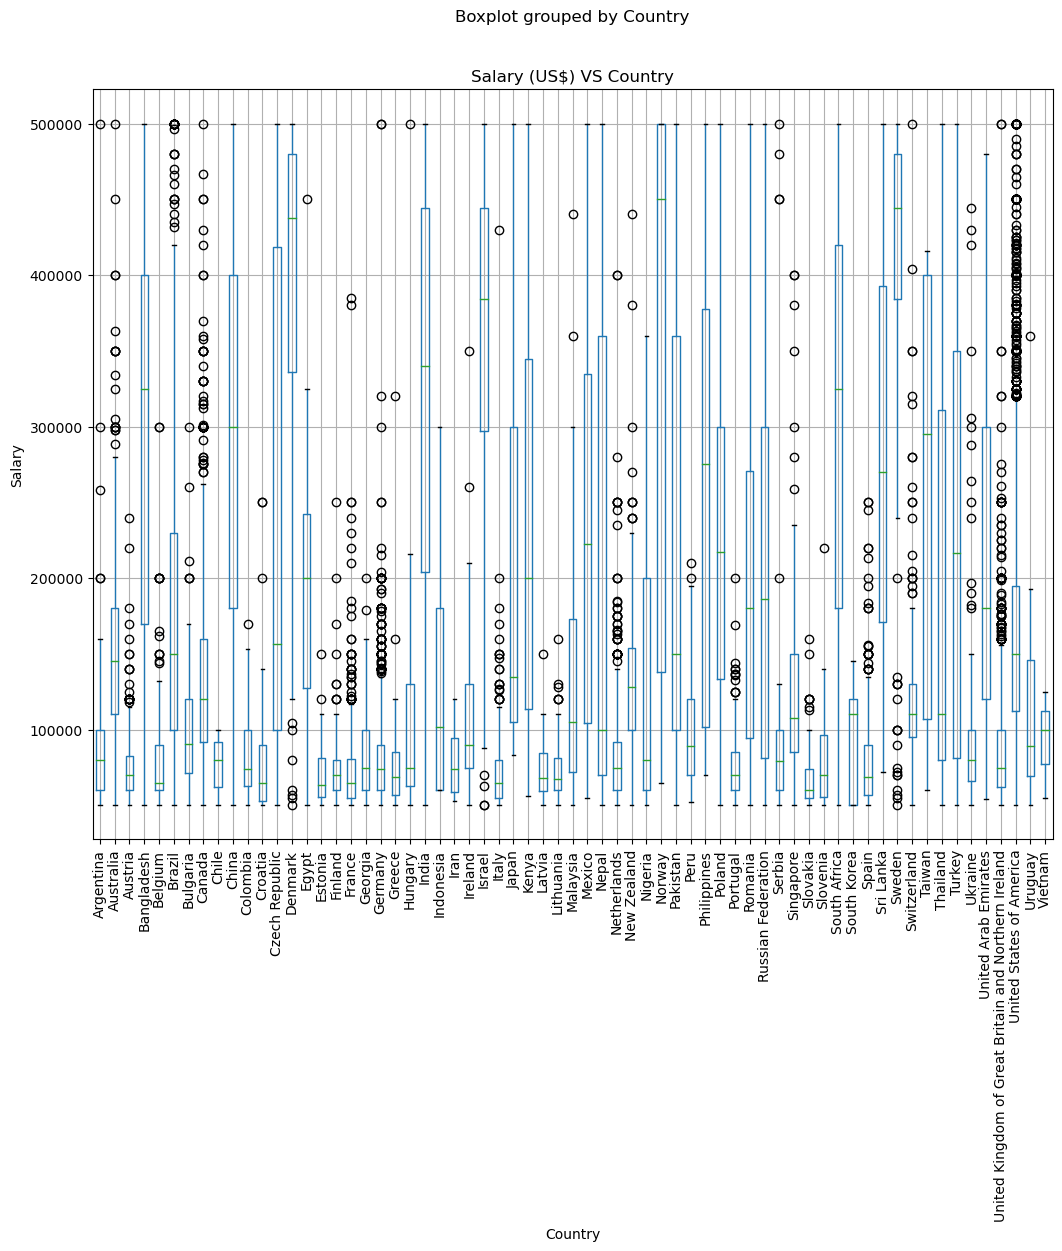

<Figure size 640x480 with 0 Axes>

In [60]:
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

In [45]:
for index, row in df.iterrows():
    if 'Viet Nam' in row['Country']:
        df.loc[index, 'Country'] = 'Vietnam'

In [56]:
for index, row in df.iterrows():
    if 'Hong Kong (S.A.R.)' in row['Country']:
        df.loc[index, 'Country'] = 'China'

In [59]:
for index, row in df.iterrows():
    if 'Iran' in row['Country']:
       df.loc[index, 'Country'] = 'Iran'